In [100]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
website = requests.get('https://countrymusichalloffame.org/hall-of-fame/members/')

In [102]:
website.content



b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' />\n<link rel="profile" href="https://gmpg.org/xfn/11" />\n<link rel="pingback" href="https://countrymusichalloffame.org/wp/xmlrpc.php" />\n<!--[if lt IE 9]>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-them

In [103]:
soup = BeautifulSoup(website.content, 'lxml')



In [104]:
print(soup.find_all('div' , attrs = {'class' : "vertical-card_content--copy"}))



[<div class="vertical-card_content--copy">
<p>
                    Inducted 1962                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2005                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2001                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1966                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1973                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1969                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2005                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2013                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1999                  </p>
</div>]


In [105]:
names = []
years = []

def add_names():
    for name in soup.find_all('h3'):
        names.append(str(name.string))

def add_years():
    for year in soup.find_all('div' , attrs = {'class' : "vertical-card_content--copy"}):
        years.append("".join(year.p.string.split()).replace("Inducted", ""))

website = requests.get('https://countrymusichalloffame.org/hall-of-fame/members/')
add_names()
add_years()

        
#secondpageto16page        
for iter in range(15):
    website = requests.get('https://countrymusichalloffame.org/hall-of-fame/members/page/%d'%(iter+2))
    soup = BeautifulSoup(website.content, 'lxml')
    add_names()
    add_years()
    
df = pd.DataFrame({"Name": names, "Year Inducted" : years})  
df

,Name,Year Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999
9,Bobby Braddock,2011


<BarContainer object of 58 artists>

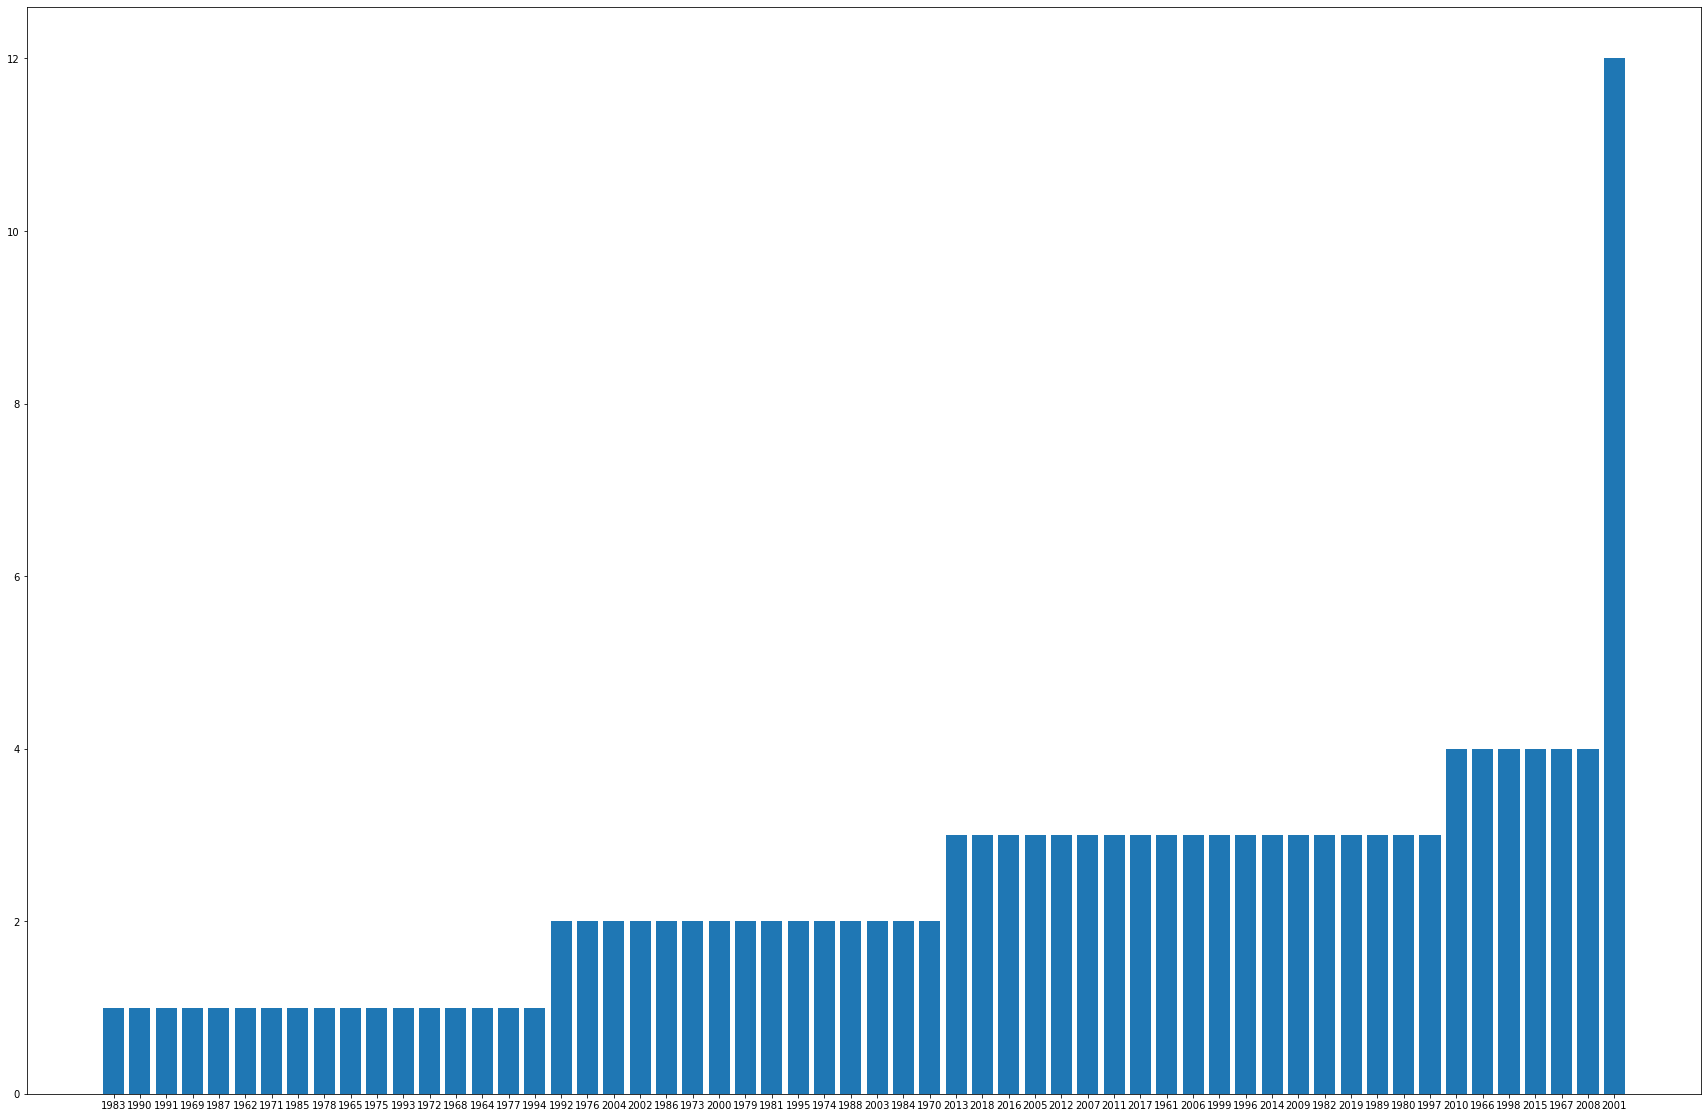

In [80]:
f, ax = plt.subplots(figsize=(30,20))
plt.bar(a['index'], a['Year Inducted'])

In [81]:
a = pd.DataFrame([df['Year Inducted'].value_counts().sort_values()])

In [94]:
df['birthdate'] =""
df['deathdate']=""
df['birthplace']=""

def find_det_info():
    full_text = str(soup.find('div', {'class' : 'fl-rich-text detail-wrapper'}))



    if full_text.find('Birth') >= 0:
        df.loc[df['Name'] == df.loc[index, 'Name'], 'birthdate'] = full_text[full_text.find('Birth')+6 : full_text.find("-", full_text.find('Birth') )].strip()
        if "<" in df.loc[index, 'birthdate']:
            cut_string = df.loc[index, 'birthdate']
            df.loc[index, 'birthdate'] = cut_string[: cut_string.find('<')]
  

    if full_text.find('Death') >= 0:
        df.loc[df['Name'] == df.loc[index, 'Name'], 'deathdate'] = full_text[full_text.find('Death')+6 : full_text.find("-", full_text.find('Death') )].strip()
        if "<" in df.loc[index, 'deathdate']:
            cut_string = df.loc[index, 'deathdate']
            df.loc[index, 'deathdate'] = cut_string[: cut_string.find('<')]
            
    if full_text.find('Birthplace') >= 0:
        df.loc[df['Name'] == df.loc[index, 'Name'], 'birthplace'] = full_text[full_text.find('Birthplace')+11 : full_text.find("-", full_text.find('Birthplace') )].strip()
        if "<" in df.loc[index, 'birthplace']:
            cut_string = df.loc[index, 'birthplace']
            df.loc[index, 'birthplace'] = cut_string[: cut_string.find('<')]
    

In [95]:
for index, elem in df.iterrows():
    website = requests.get('https://countrymusichalloffame.org/artist/{}/'.format(df.loc[index, 'Name'].replace(' ', '-')))
    soup = BeautifulSoup(website.content, 'lxml')
    find_det_info()

In [99]:
df

,Name,Year Inducted,birthdate,deathdate,birthplace
0,Roy Acuff,1962,"September 15, 1903","November 23, 1992","Maynardville, Tennessee"
1,Alabama,2005,,,
2,Bill Anderson,2001,"November 1, 1937",,"Columbia, South Carolina"
3,Eddy Arnold,1966,"May 15, 1918","May 8, 2008","Henderson, Tennessee"
4,Chet Atkins,1973,"June 20, 1924","June 30, 2001","Luttrell, Tennessee"
5,Gene Autry,1969,"September 29, 1907","October 2, 1998","Tioga, Texas"
6,DeFord Bailey,2005,"December 14, 1899","July 2, 1982","Smith County, Tennessee"
7,Bobby Bare,2013,"April 7, 1935",,"Lawrence County, Ohio"
8,Johnny Bond,1999,"June 1, 1915","June 12, 1978","Enville, Oklahoma"
9,Bobby Braddock,2011,"August 5, 1940",,"Lakeland, Florida"


In [97]:
df.to_csv('adf.csv')

In [98]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
df['firstname'] = df['Name'].apply(lambda x: ''.join(x.split()[:-1]))

In [ ]:
df['lastname'] = df['Name'].str.split().str[-1]

In [ ]:
x=[]

for i in soup.bfind_all('p', text=lambda x: x and 'Inducted' in x):
    test2=i.string.strip().replace('Inducted','')
    print(test2)
    x.append(test2)